## ` Necessary Library`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import os
os.chdir('C:/Users/Atul Bharadva/Desktop/Komal/Hackathon2/Data')
os.getcwd()

'C:\\Users\\Atul Bharadva\\Desktop\\Komal\\Hackathon2\\Data'

## `Data loading `

In [3]:
data_train=pd.read_csv('train.csv').set_index('ID')
data_train.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


### <b> `Null value Check` <b>

In [4]:
def null_value_cheak(dataframe):
    null_value=dataframe.isna().sum()
    return null_value

null_value_cheak(data_train)

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
c

Description:-dataset dont have "null" value..

### ` Data basic information and description:-`

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 12554 to 4547
Data columns (total 43 columns):
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-null float64
vehicle_loan_active      15000

In [6]:
def data_describe(data):
    data=data.select_dtypes(include=np.number)
    des=data.describe().T
    return des 

data_describe(data_train)

,count,mean,std,min,25%,50%,75%,max
age,15000.0,47.790600,3.063277e+01,25.00,33.0000,40.00,53.0000,223.00
region_code,15000.0,598.415467,2.200623e+02,123.00,424.0000,623.00,799.0000,974.00
cc_cons_apr,15000.0,17957.391719,2.518794e+04,253.00,4411.0275,10288.10,21405.0000,441031.33
dc_cons_apr,15000.0,8171.098287,1.477303e+04,19.35,1634.0000,3996.90,9339.0200,229255.00
cc_cons_may,15000.0,16337.054662,2.706085e+04,157.00,3638.0000,8695.03,18951.3000,1117246.31
dc_cons_may,15000.0,7703.605203,1.898730e+04,22.00,1643.5000,3820.50,8212.0000,911223.49
cc_cons_jun,15000.0,12129.010832,1.848878e+04,65.00,3004.5000,6655.25,14247.0000,382914.10
dc_cons_jun,15000.0,7097.395321,1.325170e+04,62.00,1358.7500,3327.00,7597.0000,233384.00
cc_count_apr,15000.0,41.488333,9.743225e+01,1.00,5.0000,10.00,44.0000,531.00
cc_count_may,15000.0,33.490200,4.954100e+01,1.00,8.0000,23.00,43.0000,601.00


In [7]:
std=data_train.describe().iloc[2,:]
std_0=std[std==0].index
std_0


Index(['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed'],
      dtype='object')

In [8]:
data_train=data_train.drop(std_0,axis=1)

In [9]:
#negative value treatment in investment4 column
data_train['investment_4']=data_train['investment_4'].apply(lambda x: -x if x<0 else x)


## `  Outlier detection for Numeric data`


`for categorical data`

In [10]:
def cat_data(data):
    cat_data=data.select_dtypes(include='object')
    return cat_data

def num_data(data):
    num_data=data.select_dtypes(exclude='object')
    return num_data
num_data=num_data(data_train)
num_data.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0
17645,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,...,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0
7604,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,...,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0
1590,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0
16556,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,...,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0


In [11]:
cat_data=cat_data(data_train)
cat_data.head()

,account_type,gender,loan_enq
ID,,,
12554,current,M,Y
17645,current,M,Y
7604,current,M,Y
1590,current,F,Y
16556,current,M,Y


In [12]:
cat_data=cat_data.drop('loan_enq',axis=1)

In [13]:
value= dict()
for col in cat_data.columns:
    count=cat_data[col].value_counts()/len(cat_data)
    value.update(count)
value

{'current': 0.8484666666666667,
 'saving': 0.15153333333333333,
 'M': 0.863,
 'F': 0.137}

Observations:- 'loan_enq' columns should be drop, it is totally unbalance it is not showing any trends

In [14]:
data_train=data_train.drop('loan_enq',axis=1)

# Outliers detection:

In [15]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(num_data)

,Feature,Number of Outliers
0,age,534
1,region_code,0
2,cc_cons_apr,1217
3,dc_cons_apr,1220
4,cc_cons_may,1202
5,dc_cons_may,1248
6,cc_cons_jun,1181
7,dc_cons_jun,1366
8,cc_count_apr,883
9,cc_count_may,709


Observations:
As per the IQR methodology, there are outliers in majority of the columns.
In the further steps below, we will see how to deal with the outliers.

# Treating the outliers 

In [16]:
num_data=num_data.drop('cc_cons',axis=1)

## Dependent feature treatment

In [17]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return dataframe    

num_data=treat_outliers(num_data)

In [18]:
detect_outliers(num_data)

,Feature,Number of Outliers
0,age,0
1,region_code,0
2,cc_cons_apr,0
3,dc_cons_apr,0
4,cc_cons_may,0
5,dc_cons_may,0
6,cc_cons_jun,0
7,dc_cons_jun,0
8,cc_count_apr,0
9,cc_count_may,0


In [19]:
num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']]
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.16],inclusive=(True, True))
    return dataframe

num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']]=treat_outliers(num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']])

In [20]:
detect_outliers(num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']])

,Feature,Number of Outliers
0,credit_count_may,2655
1,investment_1,0
2,investment_3,0
3,credit_count_jun,0


In [21]:
num_data['credit_count_may']= winsorize(num_data['credit_count_may'], limits=[0.05, 0.2],inclusive=(True, True))

In [22]:
data_train['cc_cons']= winsorize(data_train['cc_cons'], limits=[0.06, 0.21],inclusive=(True, True))
detect_outliers(pd.DataFrame(data_train['cc_cons']))


,Feature,Number of Outliers
0,cc_cons,0


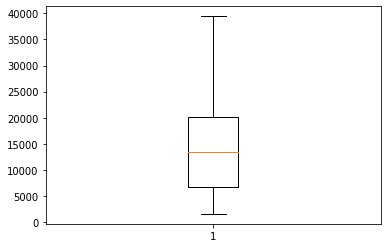

In [23]:
plt.boxplot(data_train['cc_cons'])
plt.show()

# Scaling the dependent_feature

In [24]:
def scaling(data):
    minmax=MinMaxScaler()
    minmax.fit(data)
    data_train_scale=pd.DataFrame(minmax.transform(data),columns=data.columns)
    data_train_scale=data_train_scale.set_index(data.index)
    return data_train_scale
data_scale=scaling(num_data)
data_scale.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,
12554,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.713972,0.012658,0.296296,...,1.000000,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.075188
17645,0.194444,0.000000,0.445276,0.032671,0.556750,0.000000,0.129109,0.032068,0.000000,0.061728,...,0.391555,0.052632,0.925,0.189099,0.245277,0.469946,0.463415,0.603960,0.217869,0.654691
7604,0.750000,0.872240,0.111669,0.130021,0.026136,0.224811,0.882214,0.308980,0.531646,0.370370,...,0.390449,0.052632,0.975,0.052875,0.359437,0.463928,0.121951,0.000000,0.256591,1.000000
1590,0.027778,0.974763,0.735748,0.047623,0.328078,0.557041,0.636692,0.857393,0.658228,0.000000,...,0.342674,1.000000,0.425,0.072024,0.440054,0.421058,0.463415,0.801980,0.419213,0.170516
16556,0.166667,0.872240,0.156003,0.361602,0.094195,0.097530,0.049141,0.416382,0.835443,0.555556,...,0.145733,1.000000,0.575,0.202158,0.020189,0.495596,0.146341,0.297030,0.307488,0.641291


In [25]:
merge_data=pd.concat([cat_data,data_scale,data_train['cc_cons']],axis=1)
merge_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,current,M,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.713972,...,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.075188,20014.0
17645,current,M,0.194444,0.000000,0.445276,0.032671,0.556750,0.000000,0.129109,0.032068,...,0.052632,0.925,0.189099,0.245277,0.469946,0.463415,0.603960,0.217869,0.654691,10173.0
7604,current,M,0.750000,0.872240,0.111669,0.130021,0.026136,0.224811,0.882214,0.308980,...,0.052632,0.975,0.052875,0.359437,0.463928,0.121951,0.000000,0.256591,1.000000,16095.0
1590,current,F,0.027778,0.974763,0.735748,0.047623,0.328078,0.557041,0.636692,0.857393,...,1.000000,0.425,0.072024,0.440054,0.421058,0.463415,0.801980,0.419213,0.170516,7707.0
16556,current,M,0.166667,0.872240,0.156003,0.361602,0.094195,0.097530,0.049141,0.416382,...,1.000000,0.575,0.202158,0.020189,0.495596,0.146341,0.297030,0.307488,0.641291,39456.0


# Skewness cheak

In [26]:
skew=merge_data.skew()
skew

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              1.022063
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              1.088507
cc_count_apr             1.090164
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             1.155948
dc_count_jun             0.577510
card_lim                 0.069251
investment_1             1.000492
investment_2             0.903871
investment_3             0.825876
investment_4             0.511202
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         1.004090
max_credit_amount_apr    1.002865
debit_amount_may         0.926990
credit_amount_may        0.910615
credit_count_may         0.962620
debit_count_may          0.577601
max_credit_amount_may    0.942760
debit_amount_j

In [27]:
for col in skew[skew>1].index:
    merge_data[col]=np.log1p(merge_data[col])

In [28]:
merge_data.skew()

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              0.776853
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              0.839524
cc_count_apr             0.904539
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             0.944399
dc_count_jun             0.577510
card_lim                 0.069251
investment_1             0.830930
investment_2             0.903871
investment_3             0.825876
investment_4             0.511202
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         0.856307
max_credit_amount_apr    0.723361
debit_amount_may         0.926990
credit_amount_may        0.910615
credit_count_may         0.962620
debit_count_may          0.577601
max_credit_amount_may    0.942760
debit_amount_j

# Encoding the cat Feature:

In [29]:
def encoding(data):
    for col in data.select_dtypes(include='object').columns:
        data[col]=pd.get_dummies(data[col])
    return data
    
merge_data=encoding(merge_data)

In [30]:
merge_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.538813,...,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.072495,20014.0
17645,1,0,0.194444,0.000000,0.445276,0.032149,0.556750,0.000000,0.129109,0.031565,...,0.052632,0.925,0.189099,0.245277,0.469946,0.380772,0.603960,0.217869,0.503614,10173.0
7604,1,0,0.750000,0.872240,0.111669,0.122236,0.026136,0.224811,0.882214,0.269249,...,0.052632,0.975,0.052875,0.359437,0.463928,0.115069,0.000000,0.256591,0.693147,16095.0
1590,1,1,0.027778,0.974763,0.735748,0.046523,0.328078,0.557041,0.636692,0.619174,...,1.000000,0.425,0.072024,0.440054,0.421058,0.380772,0.801980,0.419213,0.157444,7707.0
16556,1,0,0.166667,0.872240,0.156003,0.308662,0.094195,0.097530,0.049141,0.348106,...,1.000000,0.575,0.202158,0.020189,0.495596,0.136576,0.297030,0.307488,0.495483,39456.0


In [31]:
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_type,15000.0,0.848467,0.358580,0.0,1.000000,1.000000,1.000000,1.000000
gender,15000.0,0.137000,0.343859,0.0,0.000000,0.000000,0.000000,1.000000
age,15000.0,0.426200,0.341443,0.0,0.138889,0.333333,0.694444,1.000000
region_code,15000.0,0.544722,0.331886,0.0,0.276025,0.589905,0.867508,1.000000
cc_cons_apr,15000.0,0.336462,0.319272,0.0,0.079778,0.227608,0.507239,1.000000
dc_cons_apr,15000.0,0.253089,0.223416,0.0,0.067343,0.182745,0.403015,0.693147
cc_cons_may,15000.0,0.334196,0.323397,0.0,0.073603,0.217039,0.507945,1.000000
dc_cons_may,15000.0,0.331265,0.318329,0.0,0.078669,0.217624,0.497927,1.000000
cc_cons_jun,15000.0,0.336736,0.318845,0.0,0.082849,0.222134,0.511780,1.000000
dc_cons_jun,15000.0,0.244836,0.222428,0.0,0.060811,0.173914,0.382554,0.693147


# Feature Engineering

In [32]:
corr_matrix=merge_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print(to_drop)

# Dropping the high correlated features
print("Columns to be dropped: ")
merge_data.drop(to_drop,axis=1,inplace=True)

[]
Columns to be dropped: 


### Vanilla model algorithm

## `Linear Model`

In [33]:
y=merge_data['cc_cons']
X=merge_data.drop('cc_cons',axis=1)
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_type,15000.0,0.848467,0.358580,0.0,1.000000,1.000000,1.000000,1.000000
gender,15000.0,0.137000,0.343859,0.0,0.000000,0.000000,0.000000,1.000000
age,15000.0,0.426200,0.341443,0.0,0.138889,0.333333,0.694444,1.000000
region_code,15000.0,0.544722,0.331886,0.0,0.276025,0.589905,0.867508,1.000000
cc_cons_apr,15000.0,0.336462,0.319272,0.0,0.079778,0.227608,0.507239,1.000000
dc_cons_apr,15000.0,0.253089,0.223416,0.0,0.067343,0.182745,0.403015,0.693147
cc_cons_may,15000.0,0.334196,0.323397,0.0,0.073603,0.217039,0.507945,1.000000
dc_cons_may,15000.0,0.331265,0.318329,0.0,0.078669,0.217624,0.497927,1.000000
cc_cons_jun,15000.0,0.336736,0.318845,0.0,0.082849,0.222134,0.511780,1.000000
dc_cons_jun,15000.0,0.244836,0.222428,0.0,0.060811,0.173914,0.382554,0.693147


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,)

In [35]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [36]:
def model(model,X_train,X_test,y_train,y_test):
    mod=model()
    mod.fit(X_train,y_train)
    y=mod.predict(X_test)
    msle=rmsle(y_test,y)
    mse=np.sqrt(mean_squared_error(y_test,y))
    r2=r2_score(y_test,y)
    score=mod.score(X_test,y_test)
    return (msle,mse,r2,score)

In [37]:
y_test.isna().sum()

0

In [38]:
model(LinearRegression,X_train,X_test,y_train,y_test)

(1.0072685831020722,
 13058.386869982633,
 -0.00198754557384917,
 -0.00198754557384917)

In [39]:
model(Lasso,X_train,X_test,y_train,y_test)

(1.007247541203746,
 13057.751750160953,
 -0.0018900807519275364,
 -0.0018900807519275364)

In [40]:
model(Ridge,X_train,X_test,y_train,y_test)

(1.0072673443297588,
 13058.357912912283,
 -0.0019831017490548053,
 -0.0019831017490548053)

## ` Polynomial model`

In [41]:
poly_model = make_pipeline(PolynomialFeatures(2),LinearRegression())
poly_model.fit(X_train,y_train)
y_poly=poly_model.predict(X_test)
rmsle(y_test,y_poly)

1.024079518946384

## ` Decision Tree Regressor`

In [42]:
tree=DecisionTreeRegressor(random_state=42,max_depth=4)
tree.fit(X_train,y_train)
y_tree=tree.predict(X_test)
rmsle(y_test,y_tree)

1.00825295726479

## `Random Forest Regressor`

In [43]:
rfor=RandomForestRegressor(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)
rfor.fit(X_train,y_train)
y_rf=rfor.predict(X_test)
rmsle(y_test,y_rf)

1.0074245053409832

## ` XGB Regressor`

In [44]:
tree=DecisionTreeRegressor(random_state=42,max_depth=4)
xgb_clf=XGBRFRegressor(base_estimator=tree, random_state=0)
xgb_clf.fit(X_train,y_train)
xg_y=xgb_clf.predict(X_test)
rmsle(y_test,xg_y)

[10:57:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




1.007174573058236

## ` Gradient Boosting Regressor`

In [45]:
gd=GradientBoostingRegressor(random_state=0)
gd.fit(X_train,y_train)
y_gd=gd.predict(X_test)
rmsle(y_test,y_gd)

1.0107180953535062

# Hyper Parameter Tuning
### Grid Search

In [46]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [47]:
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
y_gs=grid_search.predict(X_test)
rmsle(y_test,y_gs)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 33.3min finished


1.0095698016129266

In [51]:
best_param=grid_search.best_params_
best_param

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 1000}

### Random Search

In [56]:
random_search=RandomizedSearchCV(estimator=rf,param_distributions =param_grid,n_iter=20,random_state=0)
random_search.fit(X_train,y_train)
y_rs=random_search.predict(X_test)
rmsle(y_test,y_rs)

1.0100311773296875

In [57]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_features': 3,
 'max_depth': 110,
 'bootstrap': True}

## Submission model

In [58]:
# training data
merge_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.538813,...,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.072495,20014.0
17645,1,0,0.194444,0.000000,0.445276,0.032149,0.556750,0.000000,0.129109,0.031565,...,0.052632,0.925,0.189099,0.245277,0.469946,0.380772,0.603960,0.217869,0.503614,10173.0
7604,1,0,0.750000,0.872240,0.111669,0.122236,0.026136,0.224811,0.882214,0.269249,...,0.052632,0.975,0.052875,0.359437,0.463928,0.115069,0.000000,0.256591,0.693147,16095.0
1590,1,1,0.027778,0.974763,0.735748,0.046523,0.328078,0.557041,0.636692,0.619174,...,1.000000,0.425,0.072024,0.440054,0.421058,0.380772,0.801980,0.419213,0.157444,7707.0
16556,1,0,0.166667,0.872240,0.156003,0.308662,0.094195,0.097530,0.049141,0.348106,...,1.000000,0.575,0.202158,0.020189,0.495596,0.136576,0.297030,0.307488,0.495483,39456.0


In [59]:
#final train data
train_x=merge_data.iloc[:,:-1]
train_y=merge_data.iloc[:,-1]
train_x.shape


(15000, 37)

In [81]:
train_x.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active'],
      dtype='object')

In [60]:
#final test data
test=pd.read_csv('test.csv').set_index('ID')

In [61]:
test['investment_4']=test['investment_4'].apply(lambda x:-x if x<0 else x)

In [62]:
num_test=test.select_dtypes(exclude='object')
cat_test=test.select_dtypes(include='object')

In [63]:
num_test=treat_outliers(num_test)
num_testt=scaling(num_test)
detect_outliers(num_test)

,Feature,Number of Outliers
0,age,0
1,region_code,0
2,cc_cons_apr,0
3,dc_cons_apr,0
4,cc_cons_may,0
5,dc_cons_may,0
6,cc_cons_jun,0
7,dc_cons_jun,0
8,cc_count_apr,0
9,cc_count_may,0


In [64]:
# test=pd.concat([cat_test,num_test],axis=1)
test=merge_data

In [79]:
test.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons'],
      dtype='object')

In [65]:
test

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.538813,...,0.052632,0.4500,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.072495,20014.0
17645,1,0,0.194444,0.000000,0.445276,0.032149,0.556750,0.000000,0.129109,0.031565,...,0.052632,0.9250,0.189099,0.245277,0.469946,0.380772,0.603960,0.217869,0.503614,10173.0
7604,1,0,0.750000,0.872240,0.111669,0.122236,0.026136,0.224811,0.882214,0.269249,...,0.052632,0.9750,0.052875,0.359437,0.463928,0.115069,0.000000,0.256591,0.693147,16095.0
1590,1,1,0.027778,0.974763,0.735748,0.046523,0.328078,0.557041,0.636692,0.619174,...,1.000000,0.4250,0.072024,0.440054,0.421058,0.380772,0.801980,0.419213,0.157444,7707.0
16556,1,0,0.166667,0.872240,0.156003,0.308662,0.094195,0.097530,0.049141,0.348106,...,1.000000,0.5750,0.202158,0.020189,0.495596,0.136576,0.297030,0.307488,0.495483,39456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,1,0.694444,0.637224,0.231524,0.045617,0.176116,0.220975,0.221285,0.487540,...,0.000000,0.0500,0.013482,1.000000,0.250999,0.256720,0.059406,0.823851,0.693147,4263.0
10376,1,0,0.444444,0.451104,0.720677,0.284040,0.424958,0.459502,0.052654,0.028842,...,0.157895,0.2000,1.000000,0.010321,0.201199,0.198451,0.158416,1.000000,0.209115,11019.0
2181,1,0,0.250000,0.339117,0.073187,0.031223,0.519544,0.005298,1.000000,0.087407,...,1.000000,0.0125,0.400444,0.637027,1.000000,0.047628,0.702970,0.485355,0.127969,39456.0


In [67]:
# test=test.drop(std_0,axis=1)

In [69]:
# test=test.drop('loan_enq',axis=1)

In [82]:
test=encoding(test)
test=test.drop("cc_cons",axis=1)

In [83]:
#Here we are using best hyperparameter of gridserch
param_grid1 = {'bootstrap': [True],
 'max_depth': [110],
 'max_features': [2],
 'min_samples_leaf': [5],
 'min_samples_split': [8],
 'n_estimators': [1000]}

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

In [84]:
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search=GridSearchCV(estimator=rf,param_grid =param_grid1,cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train_x,train_y)
y_gs=grid_search.predict(test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.7s finished


In [85]:
sample_submission=pd.DataFrame(y_gs,index=test.index,columns=['cc_cons'])

In [86]:
sample_submission.to_csv('sample_submission@.csv')